In [1]:
import os
user = "ruslanahmadov" 
key = "faf7fdfcecbe76c653003ce3988f59a3"
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d alxmamaev/flowers-recognition

 95% 213M/225M [00:05<00:00, 48.7MB/s]
100% 225M/225M [00:05<00:00, 45.9MB/s]


In [13]:
!pip install torch==1.9.0 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu110/torchvision-0.8.2%2Bcu110-cp37-cp37m-linux_x86_64.whl (12.9 MB)
  Using cached torchaudio-0.7.2-cp37-cp37m-manylinux1_x86_64.whl (7.6 MB)
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
tcmalloc: large alloc 1244315648 bytes == 0x55b869f26000 @  0x7f23a40f9615 0x55b82c2c602c 0x55b82c3a617a 0x55b82c2c8e4d 0x55b82c3bac0d 0x55b82c33d0d8 0x55b82c337c35 0x55b82c2ca73a 0x55b82c338d67 0x55b82c337c35 0x55b82c2ca73a 0x55b82c338d67 0x55b82c337c35 0x55b82c2ca73a 0x55b82c338d67 0x55b82c337c35 0x55b82c2ca73a 0x55b82c338d67 0x55b82c337c35 0x55b82c2ca73a 0x55b82c338d67 0x55b82c2ca65a 0x55b82c338d67 0x55b82c337c35 0x55b82c2ca73a 0x55b82c33993b 0x55b82c337c35 0x55b82c2ca73a 0x55b82c338d67 0x55b82c338235 0x55b82c2ca73a
  Using cached https://download.pytorch.org/whl/rocm4.2/torch-1.9.0%2Bro

In [2]:
import torch
torch.__version__

'1.9.0+cu102'

In [3]:
import fastai
fastai.__version__

'1.0.61'

In [4]:
from fastai import vision

In [5]:
from fastai.vision import *

In [6]:
!unzip "/content/flowers-recognition.zip"

Archive:  /content/flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.

In [7]:
classes = ['sunflower','tulip','rose','dandelion','daisy']

In [8]:
path = Path('/content/flowers')
path.ls()

[PosixPath('/content/flowers/dandelion'),
 PosixPath('/content/flowers/tulip'),
 PosixPath('/content/flowers/daisy'),
 PosixPath('/content/flowers/sunflower'),
 PosixPath('/content/flowers/rose')]

In [9]:
bs = 16

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.

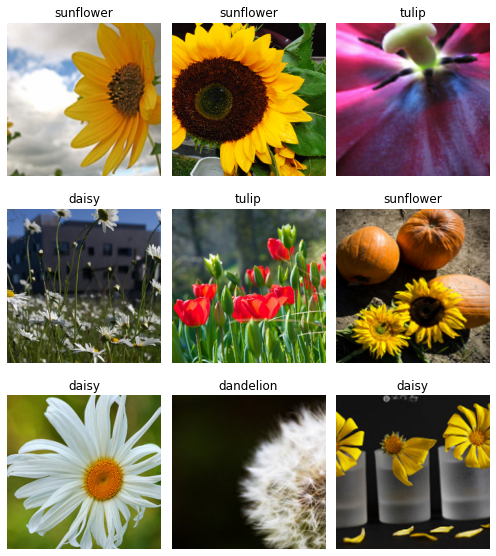

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], 5, 3454, 863)

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], model_dir='/output/model/')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [18]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.732971,0.496516,0.135574,0.864426,01:07
1,0.564534,0.353109,0.120510,0.879490,01:03
2,0.460354,0.330409,0.115875,0.884125,01:03
3,0.404891,0.301007,0.099652,0.900348,01:03
4,0.317970,0.260493,0.082271,0.917729,01:03
5,0.249423,0.205790,0.062572,0.937428,01:03
6,0.231622,0.195133,0.059096,0.940904,01:03
7,0.177661,0.195531,0.059096,0.940904,01:03


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [40]:
from IPython.display import Image, display

In [52]:
img = learn.data.train_ds[2][0]

In [53]:
learn.predict(img)

(Category tensor(1),
 tensor(1),
 tensor([2.1540e-04, 9.9972e-01, 8.3489e-08, 4.7163e-06, 6.0590e-05]))

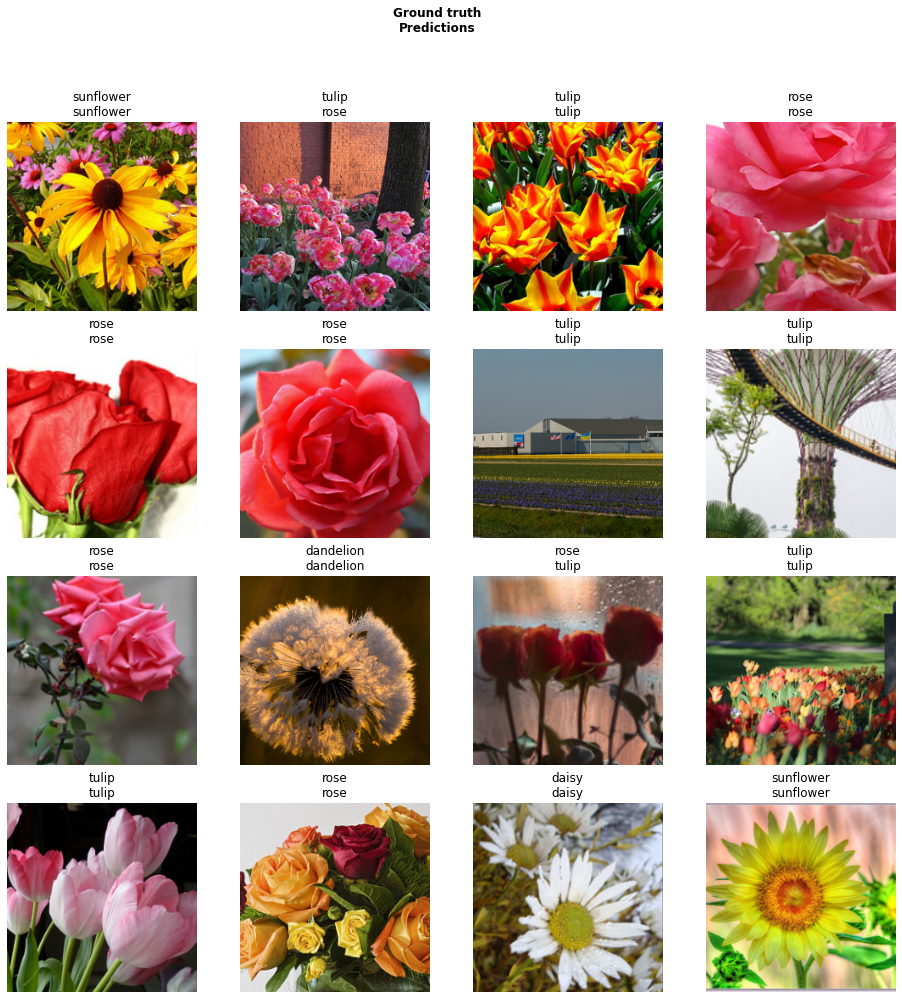

In [54]:
learn.show_results()